# Homework 4: Final Project
Taxis are widely used in New York City and the recorded information of where and when taxi cabs are requested can be valuable to understand traffic flow and movement patterns in the city. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC). The For-Hire Vehicle (“FHV”) trip records include fields capturing the dispatching base license number and the pick-up date, time, and taxi zone location ID (shape file below). These records are generated from the FHV Trip Record submissions made by bases. 

In particular, we will study how the COVID-19 pandemic affected taxi ridership as well as pickup-dropoff location patterns in NYC. We can think of March 2020 to be a sort of natural experiment to understand how increased remote working would change city traffic patterns. The key challenge is that the data that we consider is highly seasonal. Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year, as a result we will have to tease out the differences between changes due to seasonality versus changes due to COVID-19.

The homework assignment will directly build on the reading and reflection for the last week.

### Setup. Accessing and Loading The Dataset
The dataset in question covers taxi trips in NYC in the first six months of 2020. There are millions of such trips, and we will use scalable data science tools to analyze this data.  All of data is organized in a google drive.

https://drive.google.com/drive/folders/1ZpljF2lGBkc2MMG6IdWxQQuQW6Zfpswg?usp=sharing

* The first thing that you need to do is to create a shortcut to this shared folder in your drive. You can do so by clicking on the folder name at the top and adding a shortcut. 

* Next, run the following code that mounts your drive to the collab notebook.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once you mount the drive, you should be able to access the directory as you would in standard Python. You can see that there are all the files that we covered in class!

In [17]:
import os
os.listdir('/content/drive/My Drive/tripdata/')

['Legally_Operating_Businesses.csv',
 'fhvhv_tripdata_2020-01.csv',
 'fhvhv_tripdata_2020-02.csv',
 'fhvhv_tripdata_2020-03.csv',
 'fhvhv_tripdata_2020-04.csv',
 'fhvhv_tripdata_2020-05.csv',
 'fhvhv_tripdata_2020-06.csv',
 'taxi-zones']

## Loading This Data Into Dask
We will use the Dask library to load and process this data. First, run the following code to install the dask dataframe package.

In [4]:
!pip install dask[dataframe]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 4.6 MB/s 


We can import Dask as before.

In [7]:
import dask.dataframe as dd
import geopandas as gpd
import pandas as pd

As, in lecture, the following code will load the taxi trip data into Dask.

In [10]:
df = dd.read_csv('/content/drive/My Drive/tripdata/fhvhv_tripdata_2020-*.csv')
df.head()


,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0003,B02864,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,NaN
1,HV0003,B02682,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,NaN
2,HV0003,B02764,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,NaN
3,HV0003,B02764,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,NaN
4,HV0003,B02764,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,NaN


### Demo Code
Here, we paste some of the demo code from lecture that runs the basic analysis we covered in lecture. It calculates the mean and standard deviation of the length of trips in the covered time-period.

In [18]:
df['dropoff_datetime_py'] = dd.to_datetime(df['dropoff_datetime'])
df['pickup_datetime_py'] = dd.to_datetime(df['pickup_datetime'])
df['difference'] = (df['dropoff_datetime_py'] - df['pickup_datetime_py'])
df['difference_seconds'] = df['difference'].dt.total_seconds()
df['difference_seconds'].mean().compute(), df['difference_seconds'].std().compute()

(1013.1593988487339, 691.1400486498965)

### Question 1. How Does The Average Length of Trip Change At the Start of the COVID-19 Pandemic (March 20th)?

It is your responsibility to read the Dask documentation and learn the right syntax for answering this question. 

https://docs.dask.org/en/latest/dataframe.html

In [19]:
from datetime import datetime 
# df.timestamp.month
#df[df.pickup_datetime > '2020-03-20 00:00:00']
#df[df.pickup_datetime]

#covid_start = df.timestamp('2020-3-20')

covid_date = datetime(2020, 3, 20)
df1 = df[df['pickup_datetime_py'] < covid_date]
df2 = df[df['pickup_datetime_py'] >= covid_date]

precovid_avg = df1['difference_seconds'].mean().compute()
covid_avg = df2['difference_seconds'].mean().compute()


Your answer goes here.

### Question 2. What Is the Most Popular Taxi Route in the City?
PULocationID, DOLocationID describe the pickup and dropoff locations of the taxi ride. What is the most popular pair?

In [16]:
pop_route = df.groupby(['PULocationID', 'DOLocationID']).count()
max = pop_route.idxmax().compute()
max

SR_Flag                 (61, 61)
dispatching_base_num    (76, 76)
dropoff_datetime        (76, 76)
hvfhs_license_num       (76, 76)
pickup_datetime         (76, 76)
dtype: object

Your answer goes here

### Question 3. What is the Most Popular Time of Data To Request a Taxi?
Use the pickup time to determine when taxis get requested the most. You will plot this data as a histogram. The following code will help you get started.

In [ ]:
#create some random data
# import random 

# hours = [ str(i)+':00' for i in range(24)] #hours of the day
# data = [random.randint(0, 10) for i in range(24)] #for each hour set a random number 0 to 10

The code below plots this data.

<BarContainer object of 24 artists>

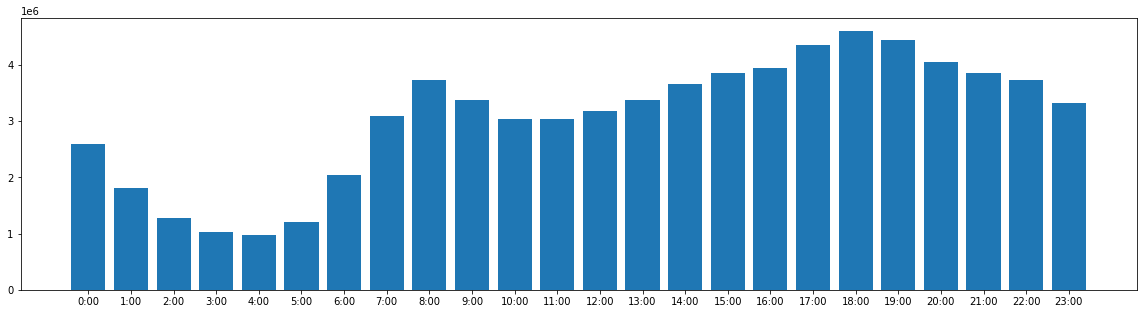

In [64]:
import datetime 
import matplotlib.pyplot as plt

hours = [ str(i)+':00' for i in range(24)]
df['pickup_hour'] = df.pickup_datetime_py.dt.hour
freq = df['pickup_hour'].value_counts()
data = freq.compute().sort_index()

plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(hours, data)

In [ ]:
# Your code here

Any dicussion goes here.

### Question 4. Load the Geospatial Taxi Zone Data Using Geopandas
The fields above have two interesting columns: 'PULocationID' and 'DOLocationID'. These ids correspond to locations in the city called "taxi zones". You will next use the geopandas library to load the latitude and longitude regions that each of the NYC taxi zones correspond to. In the tripdata folder, there is a subfolder called taxi-zones. From that folder you will use geopandas to load the "shp" file. Please look at prior class lectures for an example of how to do this.

Then, plot the loaded shapefile. Your plot should look as follows:
https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.32.36%20PM.png

In [6]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 53.3 MB/s 
     |████████████████████████████████| 6.3 MB 62.5 MB/s 


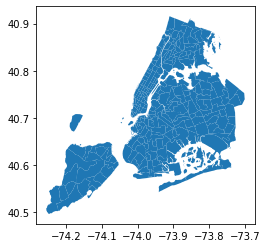

In [21]:
taxi_zones = gpd.read_file('/content/drive/My Drive/tripdata/taxi-zones/geo_export_8fa447e4-1d62-4164-9635-24c69774a066.shp')
taxi_zones.plot()

### Question 5. Number of Pickup and Dropoffs Across The City
For each taxi zone you will calculate total number of pickups and dropoffs originating from or ending at respectively. Your code should result in two plots: https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.36.05%20PM.png

https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.38.29%20PM.png

In [27]:
pu_counts = df.groupby('PULocationID').size().compute().reset_index(name='pu_counts')
do_counts = df.groupby('DOLocationID').size().compute().reset_index(name='do_counts')


#do_counts = df.groupby('DOLocationID').size().compute().reset_indx(name='do_counts')

In [28]:
taxi_zones = pd.merge(taxi_zones, pu_counts, how='inner', left_on='location_i', right_on='PULocationID')
taxi_zones = pd.merge(taxi_zones, do_counts, how='inner', left_on='location_i', right_on='DOLocationID')



Text(70.36680487104383, 0.5, 'Latitude')

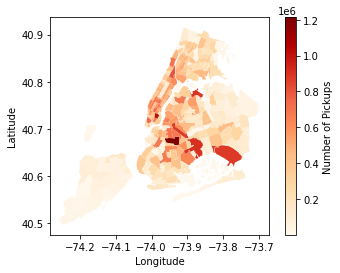

In [29]:
pu_plot = taxi_zones.plot(column='pu_counts', cmap='OrRd', legend='True', legend_kwds={'label': "Number of Pickups"})
pu_plot.set_xlabel("Longitude")
pu_plot.set_ylabel("Latitude")

Text(70.36680487104383, 0.5, 'Latitude')

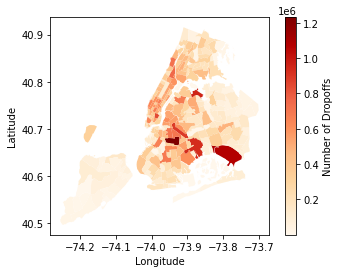

In [30]:
do_plot = taxi_zones.plot(column='do_counts', cmap='OrRd', legend='True', legend_kwds={'label': "Number of Dropoffs"})
do_plot.set_xlabel("Longitude")
do_plot.set_ylabel("Latitude")

### Question 6. Average Trip Duration in Seconds By Pickup Location
For each pickup location, you will plot a map that considers the average trip duration in seconds. Your map should look something like this:
https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.40.37%20PM.png

In [31]:
df.head(10)
avg_duration = df.groupby(['PULocationID'])['difference_seconds'].mean().compute().reset_index(name='avg_duration')
#avg_duration

taxi_zones

#calculate each trip duration in seconds, merge this w geopandas 
# groupby location, then average the trip duration by location, and plot 

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID,pu_counts,DOLocationID,do_counts
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,2273,1,325432
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,137,2,198
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,179605,3,173312
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,273790,4,235624
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5,17603,5,16831
...,...,...,...,...,...,...,...,...,...,...,...
255,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712...",256,578155,256,551674
256,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",259,232457,259,194384
257,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",260,287970,260,298769
258,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",261,221625,261,214343


In [32]:
taxi_zones = pd.merge(taxi_zones, avg_duration, how='inner', left_on='location_i', right_on='PULocationID')
taxi_zones.head(10)

#taxi_zones = pd.merge(taxi_zones, do_counts, how='inner', left_on='location_i', right_on='DOLocationID')


,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID_x,pu_counts,DOLocationID,do_counts,PULocationID_y,avg_duration
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,2273,1,325432,1,2519.688077
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,137,2,198,2,1226.270073
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,179605,3,173312,3,803.893683
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,273790,4,235624,4,1035.683849
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5,17603,5,16831,5,896.627336
5,Staten Island,6.0,6.0,0.000606,0.150491,Arrochar/Fort Wadsworth,"POLYGON ((-74.06367 40.60220, -74.06351 40.602...",6,33610,6,35154,6,845.090925
6,Queens,7.0,7.0,0.000390,0.107417,Astoria,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",7,685710,7,678115,7,926.402258
7,Queens,8.0,8.0,0.000027,0.027591,Astoria Park,"POLYGON ((-73.92334 40.77513, -73.92398 40.774...",8,1925,8,2176,8,934.122597
8,Queens,9.0,9.0,0.000338,0.099784,Auburndale,"POLYGON ((-73.78502 40.76104, -73.78486 40.760...",9,55656,9,55678,9,829.764158
9,Manhattan,24.0,24.0,0.000061,0.047000,Bloomingdale,"POLYGON ((-73.95954 40.79872, -73.96004 40.798...",24,121051,24,113488,24,1050.597252


Text(70.36680487104383, 0.5, 'Latitude')

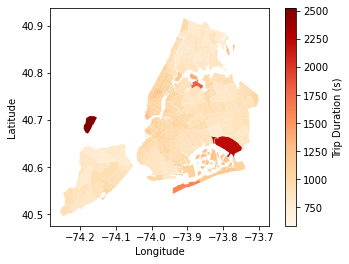

In [17]:
seconds_plot = taxi_zones.plot(column='avg_duration', cmap='OrRd', legend='True', legend_kwds={'label': "Trip Duration (s)"})
seconds_plot.set_xlabel("Longitude")
seconds_plot.set_ylabel("Latitude")

### Question 7. The Effects of the COVID Pandemic.
Next, you will only consider the pickups that occur in the month of March 2020. For these trips, we will consider a subset that happened before March 20th, and those that happen on or after March 20th. For each taxi region, you will count the number of trips originating from the region. Then, you will determine the percentage change before and after the pandemic, i.e., (before - after)/before * 100 %. 

Your final result should look like this: https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.44.36%20PM.png

In [12]:
# find subsets of pickups occurring before + after 3/20. 
# calculate percent change 
# group by region.

from datetime import datetime 

covid_date = datetime(2020, 3, 20)
start = datetime(2020, 3, 1)
end = datetime(2020, 4, 1)

df1 = df[(df['pickup_datetime_py'] < covid_date) & (df['pickup_datetime_py'] > start)]
df2 = df[(df['pickup_datetime_py'] >= covid_date) & (df['pickup_datetime_py'] < end)]


In [37]:
precovid_pu = df1.groupby('PULocationID').size().compute().reset_index(name='precovid_pu')
postcovid_pu = df2.groupby('PULocationID').size().compute().reset_index(name='postcovid_pu')

#pickups by location ID, before and after covid! 

#precovid_pu.head(10)

In [38]:
taxi_zones = pd.merge(taxi_zones, precovid_pu, how='inner', left_on='location_i', right_on='PULocationID')
taxi_zones = pd.merge(taxi_zones, postcovid_pu, how='inner', left_on='location_i', right_on='PULocationID')

taxi_zones.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PULocationID_x'} in the result is deprecated and will raise a MergeError in a future version.
  


,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID_x,pu_counts,DOLocationID,do_counts,PULocationID_y,avg_duration,PULocationID_x,precovid_pu,PULocationID_y,postcovid_pu
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,2273,1,325432,1,2519.688077,1,2082,1,191
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",2,137,2,198,2,1226.270073,2,50,2,87
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3,179605,3,173312,3,803.893683,3,110591,3,69014
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4,273790,4,235624,4,1035.683849,4,213484,4,60306
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5,17603,5,16831,5,896.627336,5,12458,5,5145
5,Staten Island,6.0,6.0,0.000606,0.150491,Arrochar/Fort Wadsworth,"POLYGON ((-74.06367 40.60220, -74.06351 40.602...",6,33610,6,35154,6,845.090925,6,21177,6,12433
6,Queens,7.0,7.0,0.000390,0.107417,Astoria,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",7,685710,7,678115,7,926.402258,7,512239,7,173471
7,Queens,8.0,8.0,0.000027,0.027591,Astoria Park,"POLYGON ((-73.92334 40.77513, -73.92398 40.774...",8,1925,8,2176,8,934.122597,8,1030,8,895
8,Queens,9.0,9.0,0.000338,0.099784,Auburndale,"POLYGON ((-73.78502 40.76104, -73.78486 40.760...",9,55656,9,55678,9,829.764158,9,43817,9,11839
9,Manhattan,24.0,24.0,0.000061,0.047000,Bloomingdale,"POLYGON ((-73.95954 40.79872, -73.96004 40.798...",24,121051,24,113488,24,1050.597252,24,87888,24,33163


In [39]:
covid_data = pd.merge(precovid_pu, postcovid_pu, how='inner', on='PULocationID')
covid_data['percent_change'] = ((covid_data['precovid_pu'] - covid_data['postcovid_pu'])/ covid_data['precovid_pu'] ) * 100

taxi_zones = pd.merge(taxi_zones, covid_data, how='inner', left_on='location_i', right_on='PULocationID')
taxi_zones.head(1)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,PULocationID_x,pu_counts,DOLocationID,...,PULocationID_y,avg_duration,PULocationID_x,precovid_pu_x,PULocationID_y,postcovid_pu_x,PULocationID,precovid_pu_y,postcovid_pu_y,percent_change
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,2273,1,...,1,2519.688077,1,2082,1,191,1,2082,191,90.826129


Text(70.36680487104383, 0.5, 'Latitude')

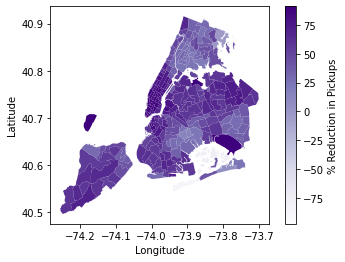

In [40]:
change_plot = taxi_zones.plot(column='percent_change', cmap='Purples', legend='True', legend_kwds={'label': "% Reduction in Pickups"})

change_plot.set_xlabel("Longitude")
change_plot.set_ylabel("Latitude")

## Question 8. Businesses in Highly Affected Taxi Zones
Finally, we have also included a dataset of businesses in NYC (Legally_Operating_Businesses.csv):
https://drive.google.com/file/d/1IQal9xJAuxMVZOofE5G1jwNf5ys80Ja_/view?usp=sharing

Over every taxi zone that had more than a 70% drop in traffic, count the number of businesses that are in those zones.

Hint 1. You will have to use the rtree package to merge the business data with the taxi zone data.

Hint 2. You will have to throw away a lot of business listings without lat,long data.

In [41]:
# dictionary where indices are zone numbers, and values are counts 
# pd.dataframe that! 

import pandas as pd 
bus_df = pd.read_csv('/content/drive/My Drive/tripdata/Legally_Operating_Businesses.csv')
bus_df = bus_df.dropna()
bus_df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
3925,2054516-DCA,Business,06/23/2020,Inactive,06/15/2017,Sidewalk Cafe,AMSTERDAM AVE BAGELS INC,BAGELS & CO,172,W 79TH ST,...,107.0,6.0,1030267.0,1011507504,MN12,165.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 2...",-73.977378,40.782737,"(40.78273740191315, -73.9773775022811)"
8584,2080663-DCA,Business,09/15/2020,Inactive,12/13/2018,Sidewalk Cafe,CHARLEY ST. INC,CHARLEY ST.,41,KENMARE ST,...,102.0,1.0,1007158.0,1004790005,MN24,41.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 9...",-73.995379,40.720774,"(40.72077412466321, -73.99537869493847)"
8654,2042866-DCA,Business,09/15/2020,Inactive,08/25/2016,Sidewalk Cafe,"IL SOLE, LLC",SOLELUNA,4345,40TH STREET,...,402.0,26.0,4002473.0,4001890005,QN31,18101.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 3...",-73.924117,40.743800,"(40.74379966785962, -73.92411727013717)"
8774,0919619-DCA,Business,09/15/2020,Inactive,03/02/2006,Sidewalk Cafe,ZESTFUL MANAGEMENT CORP.,BAR 6,502,AVENUE OF THE AMERICAS,...,102.0,3.0,1009611.0,1005760009,MN23,63.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 8...",-73.997460,40.736488,"(40.73648791689769, -73.99745966743053)"
17034,2071241-DCA,Business,04/15/2020,Inactive,05/16/2018,Sidewalk Cafe,1494 FIRST AVE RESTAURANT CORP,ITALIAN VILLAGE PIZZA,1494,1ST AVE,...,108.0,5.0,1046006.0,1014720047,MN31,132.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 3...",-73.953246,40.771559,"(40.77155905845877, -73.9532462599786)"
17117,2035427-DCA,Business,04/15/2020,Inactive,04/01/2016,Sidewalk Cafe,CORIANDER FACTORY INC.,Bo Caphe,222,LAFAYETTE ST,...,102.0,1.0,1007218.0,1004820025,MN24,45.0,"Sidewalk Cafe Type: Small Unenclosed, Square F...",-73.997388,40.722012,"(40.72201207391356, -73.99738806634454)"
20395,2058977-DCA,Business,03/31/2023,Active,10/04/2017,Garage,"PROPARK AMERICA NEW YORK, LLC",JIFFY JFK,20,WATERSIDE PLZ,...,106.0,4.0,1083709.0,1009910060,MN20,62.0,"Vehicle Spaces: 735, Bicycle Spaces: 25",-73.974160,40.737259,"(40.73725906616648, -73.974159755213)"
25744,2010312-DCA,Business,12/15/2016,Inactive,07/03/2014,Sidewalk Cafe,BLUE BELL RESTAURANT LLC,CANTINE PARISIENNE,153,ELIZABETH ST,...,102.0,1.0,1088694.0,1004790029,MN24,41.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 4...",-73.995065,40.720409,"(40.72040905870429, -73.99506486284501)"
113156,2015267-DCA,Business,05/15/2017,Inactive,11/05/2014,Sidewalk Cafe,"DUET NY, LLC",DUET BRASSERIE,74,7TH AVE,...,104.0,3.0,1013735.0,1007640042.0,MN13,81.0,"Sidewalk Cafe Type: Enclosed, Square Feet: 461...",-73.999329,40.739063,"(40.73906252074122, -73.9993288066535)"
115907,2011647-DCA,Business,04/15/2016,Inactive,08/06/2014,Sidewalk Cafe,LAIGHT RESTAURANT CORP.,DYLAN PRIME,429,GREENWICH ST,...,101.0,1.0,1002836.0,1002197501.0,MN24,39.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 8...",-74.009741,40.722220,"(40.72222029313694, -74.00974066701161)"


In [34]:
# creating geometry column which is compatible w geo col in taxi_zones 
gdf = gpd.GeoDataFrame(bus_df, geometry=gpd.points_from_xy(bus_df['Longitude'], bus_df['Latitude']))
gdf.head(10)
# taxi_zones = pd.merge(taxi_zones, bus_df, how='inner', )
# covid_data = pd.merge(precovid_pu, postcovid_pu, how='inner', on='PULocationID')



,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,geometry
3925,2054516-DCA,Business,06/23/2020,Inactive,06/15/2017,Sidewalk Cafe,AMSTERDAM AVE BAGELS INC,BAGELS & CO,172,W 79TH ST,...,6.0,1030267.0,1011507504,MN12,165.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 2...",-73.977378,40.782737,"(40.78273740191315, -73.9773775022811)",POINT (-73.97738 40.78274)
8584,2080663-DCA,Business,09/15/2020,Inactive,12/13/2018,Sidewalk Cafe,CHARLEY ST. INC,CHARLEY ST.,41,KENMARE ST,...,1.0,1007158.0,1004790005,MN24,41.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 9...",-73.995379,40.720774,"(40.72077412466321, -73.99537869493847)",POINT (-73.99538 40.72077)
8654,2042866-DCA,Business,09/15/2020,Inactive,08/25/2016,Sidewalk Cafe,"IL SOLE, LLC",SOLELUNA,4345,40TH STREET,...,26.0,4002473.0,4001890005,QN31,18101.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 3...",-73.924117,40.743800,"(40.74379966785962, -73.92411727013717)",POINT (-73.92412 40.74380)
8774,0919619-DCA,Business,09/15/2020,Inactive,03/02/2006,Sidewalk Cafe,ZESTFUL MANAGEMENT CORP.,BAR 6,502,AVENUE OF THE AMERICAS,...,3.0,1009611.0,1005760009,MN23,63.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 8...",-73.997460,40.736488,"(40.73648791689769, -73.99745966743053)",POINT (-73.99746 40.73649)
17034,2071241-DCA,Business,04/15/2020,Inactive,05/16/2018,Sidewalk Cafe,1494 FIRST AVE RESTAURANT CORP,ITALIAN VILLAGE PIZZA,1494,1ST AVE,...,5.0,1046006.0,1014720047,MN31,132.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 3...",-73.953246,40.771559,"(40.77155905845877, -73.9532462599786)",POINT (-73.95325 40.77156)
17117,2035427-DCA,Business,04/15/2020,Inactive,04/01/2016,Sidewalk Cafe,CORIANDER FACTORY INC.,Bo Caphe,222,LAFAYETTE ST,...,1.0,1007218.0,1004820025,MN24,45.0,"Sidewalk Cafe Type: Small Unenclosed, Square F...",-73.997388,40.722012,"(40.72201207391356, -73.99738806634454)",POINT (-73.99739 40.72201)
20395,2058977-DCA,Business,03/31/2023,Active,10/04/2017,Garage,"PROPARK AMERICA NEW YORK, LLC",JIFFY JFK,20,WATERSIDE PLZ,...,4.0,1083709.0,1009910060,MN20,62.0,"Vehicle Spaces: 735, Bicycle Spaces: 25",-73.974160,40.737259,"(40.73725906616648, -73.974159755213)",POINT (-73.97416 40.73726)
25744,2010312-DCA,Business,12/15/2016,Inactive,07/03/2014,Sidewalk Cafe,BLUE BELL RESTAURANT LLC,CANTINE PARISIENNE,153,ELIZABETH ST,...,1.0,1088694.0,1004790029,MN24,41.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 4...",-73.995065,40.720409,"(40.72040905870429, -73.99506486284501)",POINT (-73.99506 40.72041)
113156,2015267-DCA,Business,05/15/2017,Inactive,11/05/2014,Sidewalk Cafe,"DUET NY, LLC",DUET BRASSERIE,74,7TH AVE,...,3.0,1013735.0,1007640042.0,MN13,81.0,"Sidewalk Cafe Type: Enclosed, Square Feet: 461...",-73.999329,40.739063,"(40.73906252074122, -73.9993288066535)",POINT (-73.99933 40.73906)
115907,2011647-DCA,Business,04/15/2016,Inactive,08/06/2014,Sidewalk Cafe,LAIGHT RESTAURANT CORP.,DYLAN PRIME,429,GREENWICH ST,...,1.0,1002836.0,1002197501.0,MN24,39.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 8...",-74.009741,40.722220,"(40.72222029313694, -74.00974066701161)",POINT (-74.00974 40.72222)


In [42]:
above_thresh = taxi_zones.loc[(taxi_zones['percent_change'] > 70)]
above_thresh["location_i"] = above_thresh["location_i"].apply(int)
#above_thresh.head(10)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.5 MB/s 


In [44]:
import rtree

# filter for percent change (taxi_zones) > 70. then, count businesses in each of those regions.
# associate each business (in gdf) to a zone by first seeing wat polygon it's in (through the index intersection stuff)
# then using build_idx which will associate each polygon to a zone 

idx = rtree.index.Index() #create an empty index

# gdf.head()

def build_index(gdf):
    for i, row in gdf.iterrows():
        idx.insert(i, row['geometry'].bounds) # i should be the corresponding location id, which is in the taxi_zones df 
        
build_index(gdf)


In [45]:
from shapely.geometry import Point

def intersections(loc) :
  out = [int(i) for i in idx.intersection(loc.bounds)]
  return gdf.loc[out, :] # get all cols associated w row out? 

counts = []
for i, row in above_thresh.iterrows() :
  counts.append(len(intersections(row['geometry'])))

above_thresh.loc[:, 'count'] = counts 

# above_thresh.head()



/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [46]:
total = above_thresh['count'].sum()